In [1]:
#Importar los datos para el modelo
import kagglehub

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Testeo de datos, registros e información del CSV
import pandas as pd

data = pd.read_csv('alzheimers_disease_data.csv')
print(data.head())
print("------------------------------------------------------------------")
print(data.info())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [3]:
#Organizar los datos
import numpy as np
from sklearn.preprocessing import StandardScaler

print(data.columns) # Print column names to debug

x = data.drop(["PatientID", "Diagnosis", "DoctorInCharge"], axis = 1) #Eliminar la columna del resultado
                                                         #Eliminar la columna del doctor y del ID del paciente ya que no es de relevancia para los datos de entrada
y = data["Diagnosis"] #Etiqueta para dichos datos

#convertir a numpy
X = x.values
Y = y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X[:5])
print("---------------------------------------------")
print(X_scaled[:5])

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')
[[7.30000000e+01 0.00000000e+00 0.00000000e+00 2.00000000e+00
  2.29277492e+01 0.00000000e+00 1.32972177e+01 6.32711247e+00
  1.34721431e+00 9.02567867e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.42000000e+02 7.20000000e+01 2.42366840e+02 5.61508970e+01
  3.36825635e+01 1.6

In [4]:
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

#fijamos un valor de semilla aleatorio fijo para poder probar el modelo después con otros parámetros iniciales pero con ajuste diferente en la red
seed = 42 #valor aleatorio predefinido por defecto
random.seed(seed)
np.random.seed(42)
tf.random.set_seed(42)

X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=seed)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)




In [5]:
#Verificar etiquetas del dataset
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1389), np.int64(1): np.int64(760)}


In [6]:
import tensorflow as tf

#Construcción del modelo

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="sigmoid", use_bias=True),
])

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), #Gradiente descendente para ajustar los pesos de la red
    loss = "binary_crossentropy", #Entropía cruzada binaria ya que el target Y es 0 o 1
    metrics = ["accuracy"]
)

In [8]:
training = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5406 - loss: 0.7997
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5499 - loss: 0.7800
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5559 - loss: 0.7620
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5652 - loss: 0.7454
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 0.7301
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5864 - loss: 0.7160
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5977 - loss: 0.7029
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6077 - loss: 0.6907
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6157 - loss: 0.6794
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6210 - loss: 0.6687
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6303 - loss: 0.6588
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [9]:
#Evaluacion testeo
model.predict(X_test, batch_size=32)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.4202073 ],
       [0.9627575 ],
       [0.11358854],
       [0.0666803 ],
       [0.7270714 ],
       [0.0247494 ],
       [0.16597244],
       [0.08823651],
       [0.15414323],
       [0.7140523 ],
       [0.3086875 ],
       [0.13628541],
       [0.8976989 ],
       [0.1797522 ],
       [0.9873668 ],
       [0.9794357 ],
       [0.43322253],
       [0.57078564],
       [0.22226718],
       [0.6877693 ],
       [0.07271719],
       [0.12216853],
       [0.81122017],
       [0.39496198],
       [0.02277407],
       [0.82215875],
       [0.6533002 ],
       [0.19577229],
       [0.6062074 ],
       [0.13584687],
       [0.22130208],
       [0.830988  ],
       [0.60900915],
       [0.14464417],
       [0.22782636],
       [0.12491266],
       [0.12754151],
       [0.44582877],
       [0.12839043],
       [0.03051998],
       [0.8450198 ],
       [0.9667218 ],
       [0.37788048],
       [0.07314257],
       [0.998612  ],
       [0.09150897],
       [0.8881977 ],
       [0.268

In [10]:
#Evaluación modelo
model.fit(
  X_train, Y_train, shuffle=True, epochs=100, batch_size=32, validation_data=(X_val, Y_val)
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8650 - loss: 0.3363 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8670 - loss: 0.3348 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8677 - loss: 0.3333 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8677 - loss: 0.3318 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8697 - loss: 0.3304 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8697 - loss: 0.3289 - val_accuracy: 0.7609 - val_loss: 0.5230
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8697 - loss: 0.3275 - val_accuracy: 0.7609 - val_loss: 0.5230
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8710 - loss: 0.3261 - val_accuracy: 0.7609 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


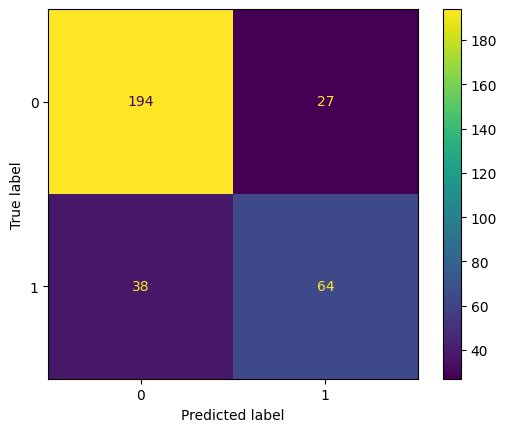

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

# convertir a 0/1 según un umbral (normalmente 0.5)
y_pred = (y_pred_proba > 0.5).astype("int32")


cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [12]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       221
           1       0.70      0.63      0.66       102

    accuracy                           0.80       323
   macro avg       0.77      0.75      0.76       323
weighted avg       0.79      0.80      0.80       323



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


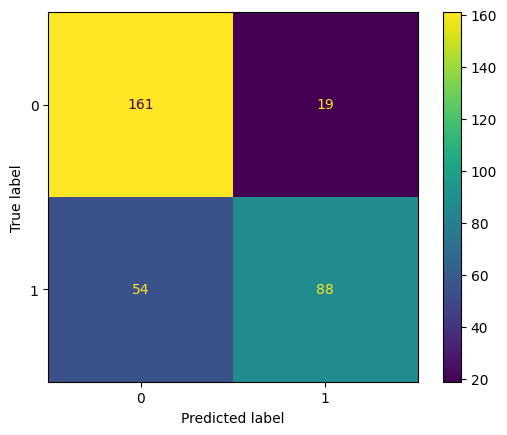

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_val)

# convertir a 0/1 según un umbral (normalmente 0.5)
y_pred = (y_pred_proba > 0.5).astype("int32")


cm = confusion_matrix(Y_val, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [14]:
print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       180
           1       0.82      0.62      0.71       142

    accuracy                           0.77       322
   macro avg       0.79      0.76      0.76       322
weighted avg       0.78      0.77      0.77       322



47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


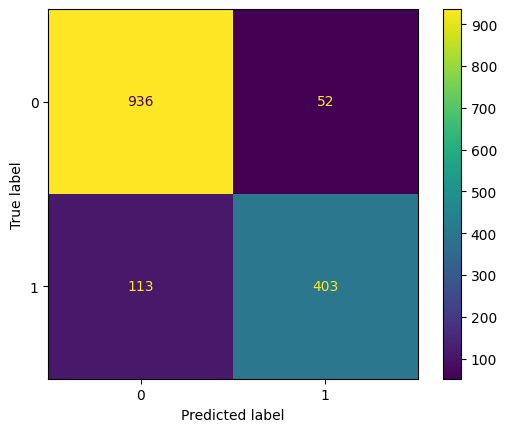

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_train)

# convertir a 0/1 según un umbral (normalmente 0.5)
y_pred = (y_pred_proba > 0.5).astype("int32")


cm = confusion_matrix(Y_train, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [16]:
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       988
           1       0.89      0.78      0.83       516

    accuracy                           0.89      1504
   macro avg       0.89      0.86      0.87      1504
weighted avg       0.89      0.89      0.89      1504



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(model, X, y, dataset_name):
    # Para clasificación binaria/multiclase con Keras
    y_pred_prob = model.predict(X)
    
    # Si es binaria: convertir probabilidades a 0/1
    if y_pred_prob.shape[1] == 1:  
        y_pred = (y_pred_prob > 0.5).astype("int32")
    else:  # Si es multiclase
        y_pred = y_pred_prob.argmax(axis=1)
    
    return {
        "Dataset": dataset_name,
        "Accuracy": round(accuracy_score(y, y_pred), 3),
        "Precision": round(precision_score(y, y_pred, average="weighted"), 3),
        "Recall": round(recall_score(y, y_pred, average="weighted"), 3),
        "F1-Score": round(f1_score(y, y_pred, average="weighted"), 3)
    }

resultados = []
for X, y, nombre in [(X_train, Y_train, "Train"), (X_val, Y_val, "Validation"), (X_test, Y_test, "Test")]:
    resultados.append(calcular_metricas(model, X, y, nombre))

import pandas as pd
df_dnn = pd.DataFrame(resultados)
df_dnn["Modelo"] = "DNN"

print(df_dnn)

# Guardar para combinar luego
df_dnn.to_csv("resultados_dnn.csv", index=False)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
      Dataset  Accuracy  Precision  Recall  F1-Score Modelo
0       Train     0.890      0.890   0.890     0.888    DNN
1  Validation     0.773      0.781   0.773     0.767    DNN
2        Test     0.799      0.794   0.799     0.795    DNN
